# Project02 - Conversion Rate

The dataset is from an E-commerce site. It includes the users' country, age, whether new user or not, marketing channel, the number of pages visited during that session. Also it includes the data whether they converted or not.

The project objective to analyse what make an effect on the conversion rate and come up with recommendations for the product and the marketing teams to improve conversion rate.

Four parts are included in this project:

- 1. Exploratory and Descriptive Analysis
 
- 2. Data Visualization
 
- 3. Model Building
 
- 4. Model Evaluation

## Part 1: EDA

It is used to show the basic information about this dataset, including the shape of dataset, the labels of categorical data, and the general trend.

(data cleaning is included in this part, while one-hot coding is not.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.1 Loading Data

In [2]:
df_raw = pd.read_csv("conversion_project.csv")

df = df_raw.copy(deep = True)

df.head(5)

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


### 1.2 Dataset Shape

In [3]:
# Display the shape of dataset
pd.DataFrame([[df.shape[0], df.shape[1]]], columns = ['Row Number', 'Column Number'])

,Row Number,Column Number
0,316200,6


### 1.3 Data Type

In [4]:
# Display the dtype of each column
for column in df.columns:
    print(column, df[column].dtype)

country object
age int64
new_user int64
source object
total_pages_visited int64
converted int64


### 1.4 Value Counts

In [12]:
# For country
df['country'].value_counts()

country
US         178092
China       76602
UK          48450
Germany     13056
Name: count, dtype: int64

In [13]:
# For new_user
df['new_user'].value_counts()

new_user
1    216744
0     99456
Name: count, dtype: int64

In [14]:
# For source
df['source'].value_counts()

source
Seo       155040
Ads        88740
Direct     72420
Name: count, dtype: int64

In [15]:
# For converted
df['converted'].value_counts()

converted
0    306000
1     10200
Name: count, dtype: int64

In [21]:
# For pages_visited
df['total_pages_visited'].value_counts()

total_pages_visited
2     43868
3     43829
4     41046
1     40739
5     36308
6     30261
7     23488
8     17522
9     12157
10     8074
11     5394
12     3615
13     2425
14     1811
15     1325
16     1100
17      845
18      722
19      565
20      405
21      296
22      180
23      113
24       46
25       39
26       17
27        7
29        2
28        1
Name: count, dtype: int64

### 1.5 Conversion rate

conversion_rate = conversions / total_sessions 

In [17]:
conversion_rate = len(df[df['converted'] == 1]) / len(df)

round(conversion_rate, 4)

0.0323

From the above conversion rate, the new conversion rate for this dataset is about 3.23%.

### 1.6 Null/Mising value Checking

In [19]:
# Checking the null/missing value number
df.isna().sum()

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


## Part 2: Data Visualization

This part is to visualize the general trend and data pattern.

### 2.1 Country Distribution

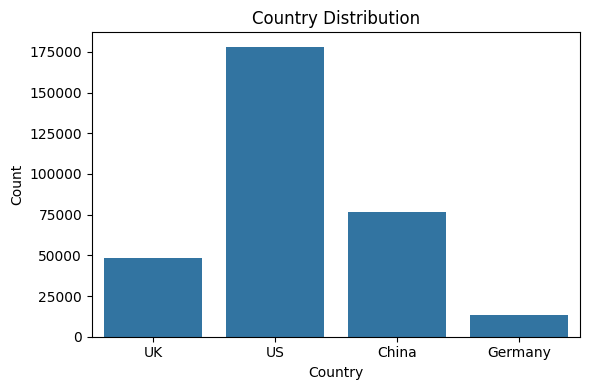

In [27]:
# The country distribution
fig1, ax1 = plt.subplots(figsize = (6, 4))

sns.countplot(data = df,
              x = 'country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Country Distribution')

plt.tight_layout()
plt.show()

### 2.2 Source Distribution

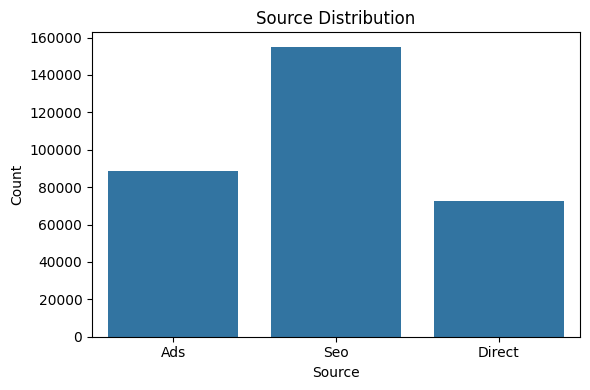

In [28]:
# The source distribution
fig2, ax2 = plt.subplots(figsize = (6, 4))

sns.countplot(data = df,
              x = 'source')
plt.xlabel('Source')
plt.ylabel('Count')
plt.title('Source Distribution')

plt.tight_layout()
plt.show()

### 2.3 Age Distribution

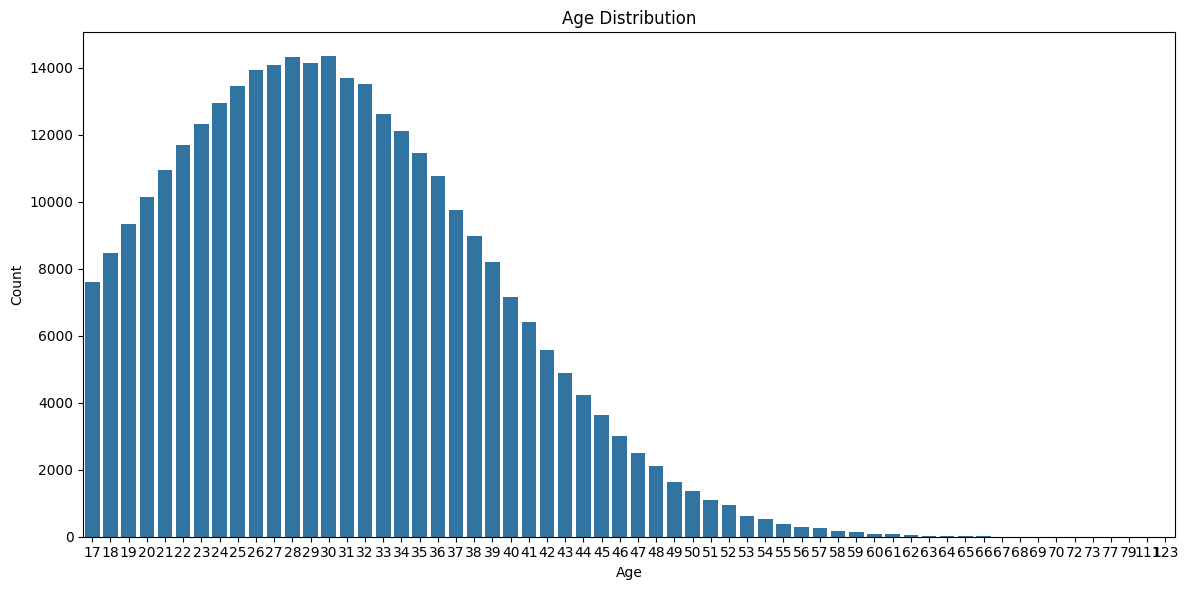

In [31]:
# The age distribution
fig3, ax3 = plt.subplots(figsize = (12, 6))

sns.countplot(data = df,
              x = 'age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')

plt.tight_layout()
plt.show()

### 2.4 User Type Distribution

C:\Users\yangy\AppData\Local\Temp\ipykernel_17916\439781696.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels(['Old User', 'New User'])


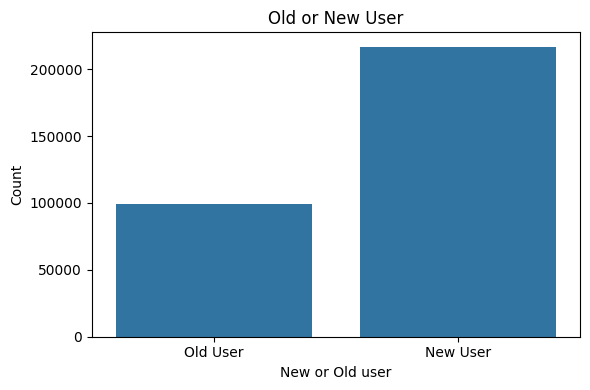

In [34]:
# New or Old user
fig4, ax4 = plt.subplots(figsize = (6, 4))

sns.countplot(data = df,
              x = 'new_user',
              ax = ax4)
ax4.set_xticklabels(['Old User', 'New User'])

plt.xlabel('New or Old user')
plt.ylabel('Count')
plt.title('Old or New User')

plt.tight_layout()
plt.show()

### 2.5 Converted user by User Type and Country

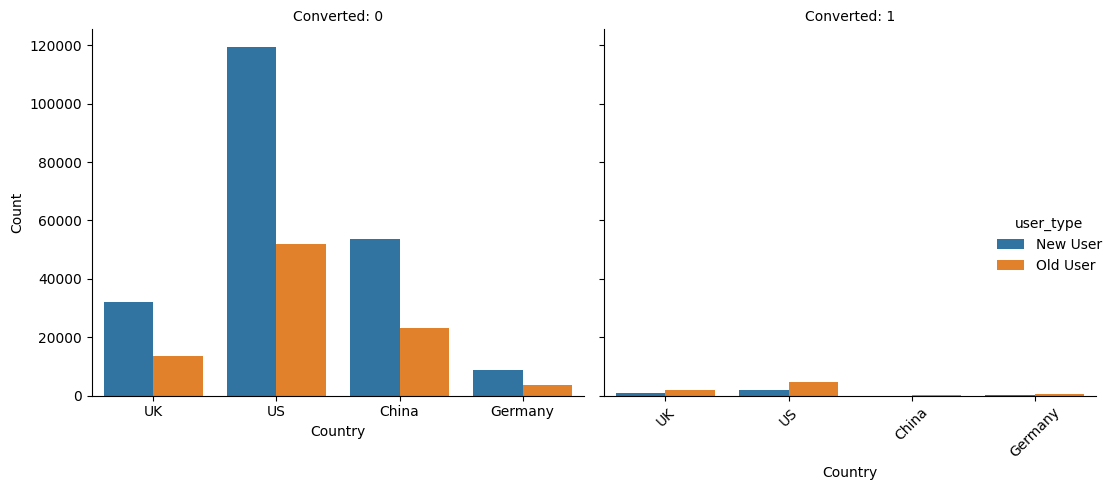

In [9]:
# The plot shows the converted user by country and user type
df['user_type'] = df['new_user'].map({1: 'New User', 0: 'Old User'})


fig5 = sns.catplot(
                    data=df,
                    x='country',
                    hue='user_type',
                    col='converted',
                    kind='count'
)

fig5.set_axis_labels('Country', 'Count')
fig5.set_titles('Converted: {col_name}')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The plot shows, most of converted users are old users(repeated users). The new user(first visited user) almost cannot be converted.

### 2.6 Conversion user By Age

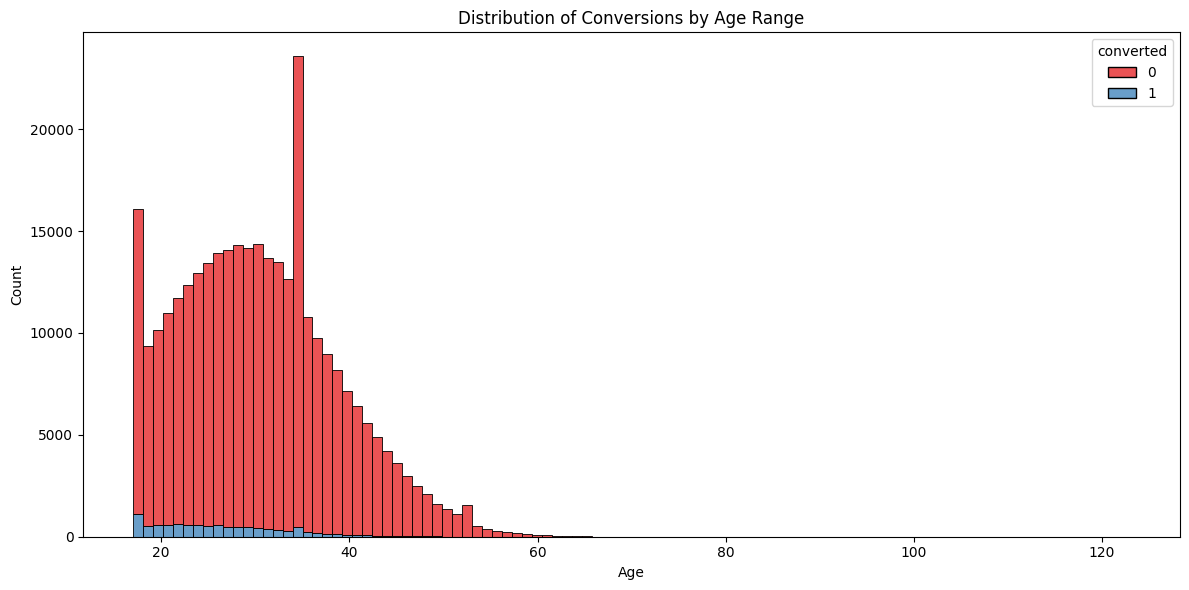

In [43]:
plt.figure(figsize=(12, 6))

sns.histplot(data=df, x='age', hue='converted', multiple='stack', bins=100, palette='Set1')


plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Conversions by Age Range')

plt.tight_layout()
plt.show()

### 2.7 Page View Distribution

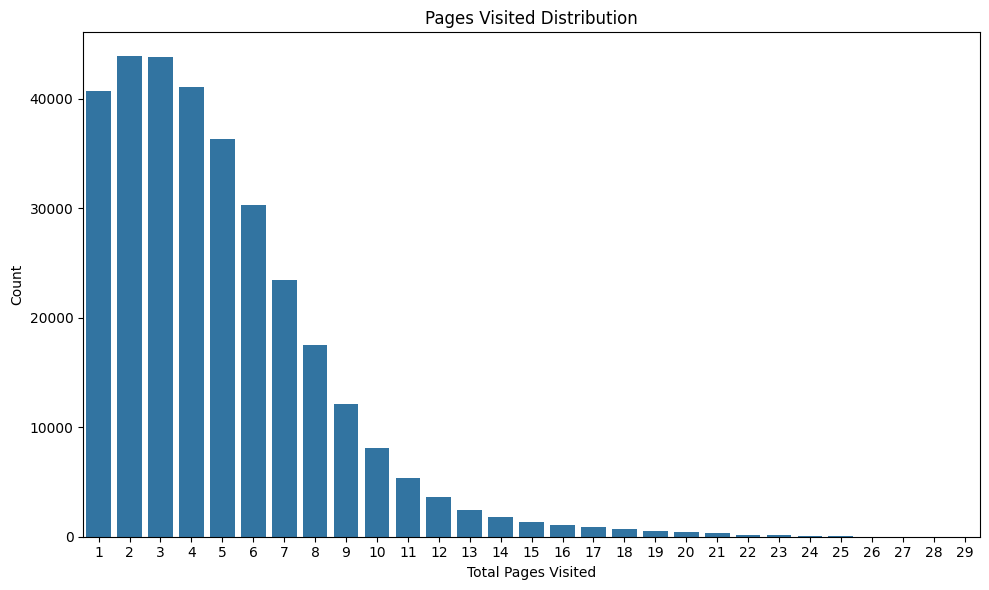

In [44]:
fig7, ax7 = plt.subplots(figsize = (10, 6))

fig7 = sns.countplot(data = df,
                     x = 'total_pages_visited')

plt.xlabel('Total Pages Visited')
plt.ylabel('Count')
plt.title('Pages Visited Distribution')

plt.tight_layout()
plt.show()

## Part 3: Modeling

Before modeling, it is necessary to preprocess the dataset. One is to one-hot coding categorical data, and second is to normalize the data, and third is to split the dataset.

### 3.1 Cleaning Outliers

There is only one column named as 'age' that I should check outliers.

In [5]:
# IQR method to detect outliers
age_q1 = df['age'].quantile(0.25)
age_q3 = df['age'].quantile(0.75)

IQR = age_q3 - age_q1

lower_bound = age_q1 - 1.5*IQR
upper_bound = age_q3 + 1.5*IQR


However, as I check the age distribution in the dataset, if the upper_bound set as 54, there are too much data to detele. It is better to keep most of them. Therefore, I decide to keep those users who are younger than 70 in the dataset.

In [6]:
df[df['age'] > upper_bound]

,country,age,new_user,source,total_pages_visited,converted
408,US,56,0,Seo,10,0
449,US,56,0,Direct,4,0
734,US,56,1,Direct,4,0
744,China,60,1,Seo,4,0
1066,China,57,1,Seo,8,0
...,...,...,...,...,...,...
314849,US,58,1,Seo,3,0
314865,US,55,1,Seo,3,0
314884,China,57,1,Seo,6,0
315381,China,56,1,Ads,3,0


In [53]:
df[df['age'] < lower_bound]

,country,age,new_user,source,total_pages_visited,converted,user_type


In [7]:
df = df[~(df['age'] > 70)]

### 3.2 One-Hot Coding

In [10]:
# Utilize the pandas package to one hot coding the data
df_encoded = pd.get_dummies(df, columns = ['country', 'source'])

# Drop the column we generate in the data visualization part
df_encoded = df_encoded.drop(columns = 'user_type')

# Converting the bool value to integer value
df_encoded = df_encoded.astype(int)

# Display the first 5 rows of df_encoded
df_encoded.head(5)

,age,new_user,total_pages_visited,converted,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0,0,1,0,1,0,0
1,23,1,5,0,0,0,0,1,0,0,1
2,28,1,4,0,0,0,0,1,0,0,1
3,39,1,5,0,1,0,0,0,0,0,1
4,30,1,6,0,0,0,0,1,0,0,1


In [11]:
# Display the shape of df_encoded
pd.DataFrame([[df_encoded.shape[0], df_encoded.shape[1]]], columns = ['Row Number', 'Column Number'])

,Row Number,Column Number
0,316194,11


### 3.3 Normalizing the data

There is one column named 'age'. However, other column data are single digital data. Before model training, it is necessary to handle the data.

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_normalized = pd.DataFrame(scaler.fit_transform(df_encoded), columns = df_encoded.columns)

df_normalized.head(5)

,age,new_user,total_pages_visited,converted,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,0.150943,1.0,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.113208,1.0,0.142857,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.207547,1.0,0.107143,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.415094,1.0,0.142857,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.245283,1.0,0.178571,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### 3.4 Splitting the data

In [13]:
from sklearn.model_selection import train_test_split

X = df_normalized.drop(columns = ['converted'])
y = df_normalized['converted']

# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print('training dataset shape is:')
print(X_train.shape)
print('testing dataset shape is:')
print(X_test.shape)


training dataset shape is:
(252955, 10)
testing dataset shape is:
(63239, 10)


### 3.5 Logistic Regression Model

After preprocessing the all data, next step is to build model. Logistic Model and Random Forest Model are used in this project.

The target variable in this project is 'converted'. The values are 0s and 1s. Therefore, Logistic Model is a good model to predict binary target variable. Compared to other models, Logistic Model is a simple and basic model for most of data scientist.

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import  roc_curve
from sklearn.metrics import  roc_auc_score
from sklearn.metrics import  precision_recall_curve
from sklearn.metrics import  auc


logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]

accuracy_lr = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy_lr)


Accuracy: 0.9862426667088348


The Logistic Regression Model accuracy is 0.9862. It is a very good score, but we still need to consider other metrics.

In [16]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     61189
         1.0       0.86      0.69      0.77      2050

    accuracy                           0.99     63239
   macro avg       0.92      0.84      0.88     63239
weighted avg       0.99      0.99      0.99     63239



For advertising, precision is more important than recall. From the above report, we can see that the precision rate of class 1 'converted' is 86%. If only considering the precision, the Logistic Regression Model performance is good.

If considering customers analysis, recall is more important than precision. The Logistic Regression Model correctly predict class 1 'converted' 69%. 

In [17]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[60951   238]
 [  632  1418]]


From the confusion matrix, the true positive instance number is 60951. The total number of instance is 63239. The true positive rate is very good.

### 3.6 Random Forest Model

The Logistic Regression Model performance is good enough. However, I still utilize random forest model, because Logistic Regression model result may be overfitting and this model could reduce the overfitting influence. That means this model may have better performance than Logistic Regression Model. 

In [15]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

y_pred_rf = random_forest_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred)

print("Random Forest Model Accuracy:", accuracy_rf)

Random Forest Model Accuracy: 0.9862426667088348


In [19]:
# Classification Report
print("Random Forest Model Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Model Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     61189
         1.0       0.80      0.69      0.74      2050

    accuracy                           0.98     63239
   macro avg       0.90      0.84      0.87     63239
weighted avg       0.98      0.98      0.98     63239



From the above classification report, we can see that the main difference between two models is the precision rate for the class 1 'converted'. The precision is a litte lower than the Logistic Regression Model, but is still 80%. That means no matter what model, the performance by precision is not bad.

In [20]:
# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Model Confusion Matrix:\n", conf_matrix_rf)

Random Forest Model Confusion Matrix:
 [[60840   349]
 [  642  1408]]


From the Random Forest Model confusion matrix, the true positive instance number is 60840. Compared to the Logistic Regression Model's, there is 100 instance number gap. However, the gap between two model is not huge. 

### 3.6 ROC and AUC

#### 3.6.1 Logistic Regression Model ROC

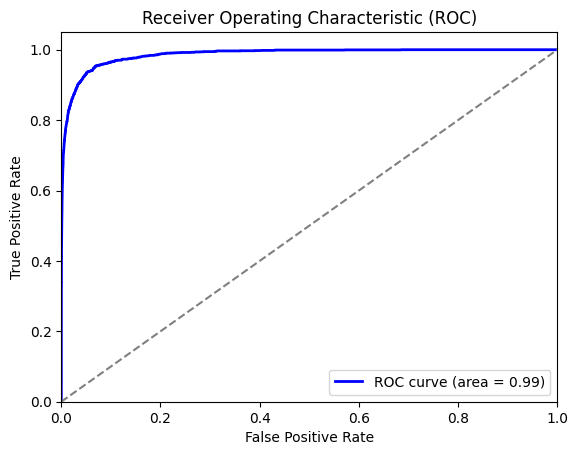

In [17]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

#### 3.6.2 Random Forest Model ROC

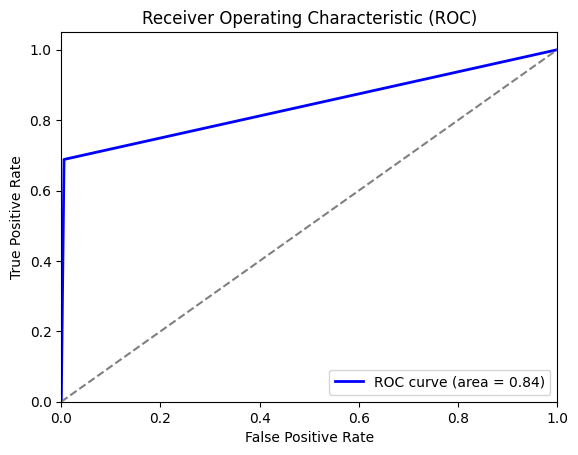

In [18]:
fpr, tpr, _ = roc_curve(y_test, y_pred_rf)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

#### 3.6.3 Result Interpretion

The area of Logistic Regression Model is 0.99, which means the very high ability to distinguish between the positive and negative class. Random Forest Model roc area is 0.84, which is less than Logistic Regression Model. 

Compared with Random Forest Model, the higher roc area of Logistic Regression Model means better performance. 

## Part 4: Analysis

The project is to build a model to predict the conversion rate in an E-commerece site. The dataset includes age, country, source, and the number of pages visited information.

Firstly, I cleaned the dataset. The process includes handling missing value, cleaning outliers, normalizing data. 

And I also built the visualization graphs to check the information of the dataset.

I built two models, Logistic Regression Model and Random Forest Model for this binary label dataset. The logistic model, (Accuracy as metric) can predict the class '1' or '0' 98% correctly. 

### 4.1 Model Comparsion

If we use metrics, accuracy, precision, recall, or F1 score as the standard of the project, the two models, Logistic Regression Model and Random Forest Model, have close prediction result. However, from the ROC graph, the learning rate of Logistic Regression Model is better than Random Forest Model. Therefore, we can say that in this project, the performance of Logistic Regression Model is better.

Logistic Regression Model may have overfitting risk compared to Random Forest Model. (Random Forest Model overfitting probability is less than Logistic Regression.) Therefore, we still objectively justify the two models. 

### 4.2 Future Improvement

Firstly, it seems that further important checking is useful. It is important to check which feature has high influence. 

Secondly, the more models can be built for better performance.